In [19]:
IMAGE = 'test-images/Sudoku Error.png'

In [20]:
%pip install --user --upgrade "opencv-python"

import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import image_utils

Note: you may need to restart the kernel to use updated packages.


In [21]:
purple = (200, 0, 200)
plt.rcParams['figure.dpi'] = 200

full_file_path = os.path.join(os.getcwd(), IMAGE)
matrix_image = cv2.imread(full_file_path, cv2.IMREAD_GRAYSCALE)
if matrix_image is None:
    print('File \'%s\' is not an image.' % IMAGE)

In [22]:
x_coords, y_coords, lines = image_utils.get_cell_boundaries(matrix_image)


Image width: 600
Image height: 599
Minimum side: 599
Minimum line length: 299
Max line gap: 5

Threshold: 299
Horizontal lines: 21
Vertical lines: 36
Rejected lines: 0
x coords before refactoring: [[35, 89], [92, 149], [151, 205], [213, 268], [270, 327], [329, 384], [392, 446], [448, 505], [508, 562]]
y coords before refactoring: [[28, 29], [31, 86], [88, 146], [148, 202], [207, 208], [210, 265], [267, 381], [383, 384], [389, 443], [445, 559]]
Refactor y coordinates
Coordinate widths histogram for refactoring:
(array([3, 0, 0, 0, 4, 1, 0, 0, 0, 2]), array([  1. ,  12.3,  23.6,  34.9,  46.2,  57.5,  68.8,  80.1,  91.4,
       102.7, 114. ]))
Min width: 41.580000000000005, Max width: 75.68000000000002
Refactor x coordinates
Coordinate widths histogram for refactoring:
(array([4, 0, 0, 2, 0, 0, 0, 0, 0, 3]), array([54. , 54.3, 54.6, 54.9, 55.2, 55.5, 55.8, 56.1, 56.4, 56.7, 57. ]))
Min width: 48.6, Max width: 59.730000000000004
x coords after refactoring: [[35, 89], [92, 149], [151, 205]

These are current setttings for threshold, min length, and max gap

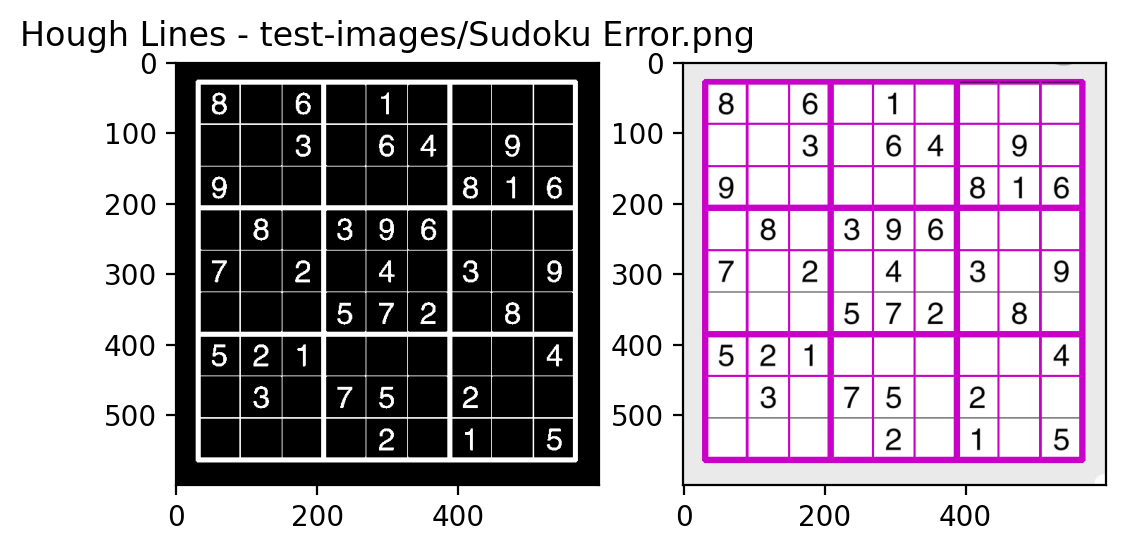

In [23]:
if matrix_image is not None:
    inverted_image = image_utils.invert_image(matrix_image)
    shape = inverted_image.shape
    image_height = shape[0]
    image_width = shape[1]
    minimum_side = min(image_height, image_width)
    min_line_length = int(minimum_side / 2)
    max_line_gap = int(minimum_side / 100)
    threshold = int(minimum_side * 0.5)
    lines = cv2.HoughLinesP(inverted_image, 1, np.pi / 180, threshold=threshold, minLineLength=min_line_length,
                            maxLineGap=max_line_gap)
    inverted_lines_image = image_utils.generate_image_with_lines(matrix_image, lines, purple)
    plt.subplot(1, 2, 1)
    plt.imshow(inverted_image, cmap='Greys_r')
    plt.title('Hough Lines - %s' % IMAGE)
    plt.subplot(1, 2, 2)
    plt.imshow(inverted_lines_image)
    plt.show()

These are expermimental settings

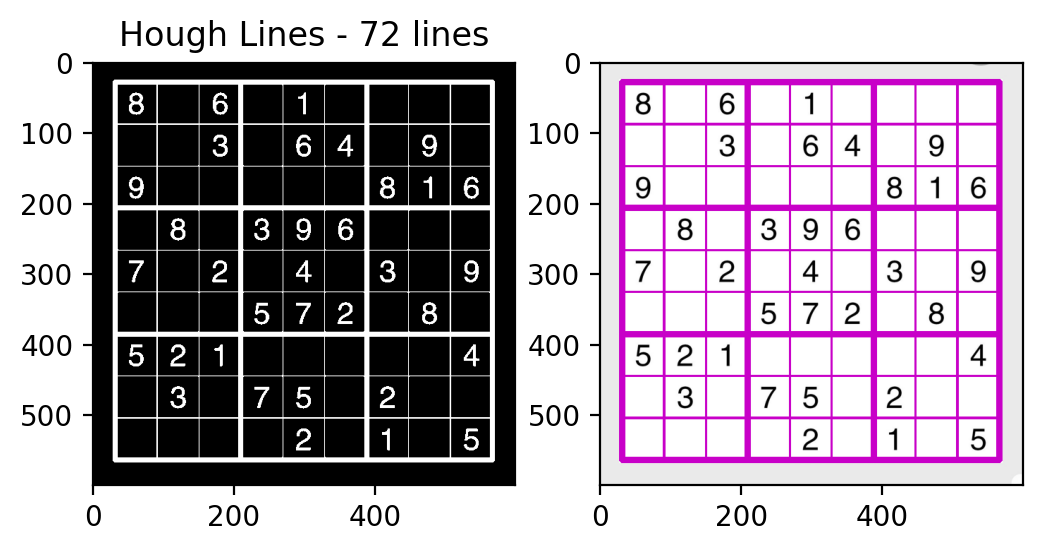

In [24]:
if matrix_image is not None:
    minimum_side = min(image_height, image_width)
    min_line_length = int(minimum_side / 2)
    # max_line_gap = int(minimum_side / 100)
    max_line_gap = int(minimum_side / 50)
    threshold = int(minimum_side * 0.5)
    lines = cv2.HoughLinesP(inverted_image, 1, np.pi / 180, threshold=threshold, minLineLength=min_line_length,
                            maxLineGap=max_line_gap)
    inverted_lines_image = image_utils.generate_image_with_lines(matrix_image, lines, purple)
    plt.subplot(1, 2, 1)
    plt.imshow(inverted_image, cmap='Greys_r')
    plt.title('Hough Lines - %s lines' % len(lines))
    plt.subplot(1, 2, 2)
    plt.imshow(inverted_lines_image)
    plt.show()